In [2]:
import os
import numpy as np
import pandas as pd
os.chdir('D:/GNN/overlapping-community-detection-master/')#更改路径，''里面为更改的路径


In [18]:
Z_pred=pd.read_csv('Z_pred.csv',sep=' ',header=None)
Z_pred

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2080,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2081,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2082,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2083,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


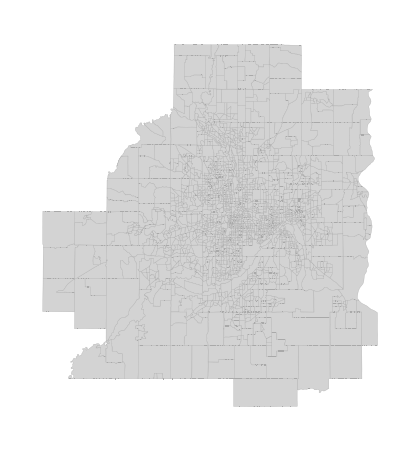

In [14]:
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

cbg_path='D:\\GNN\\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\\'

cbg = gpd.read_file(cbg_path+"geo/cbg_TCMA.geojson")


geoplot.polyplot(cbg, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))




In [15]:
import pandas as pd

cbg['CensusBlockGroup'].apply(int)
uniqueID=cbg['CensusBlockGroup'].unique()
uniqueID.sort()
#uniqueID.shape
key=range(0,2085)
dic_id = dict(zip(key, uniqueID))
dic_id_new = dict([(value, key) for (key, value) in dic_id.items()])
cbg['O_id']=cbg.CensusBlockGroup.map(dic_id_new)

In [19]:
Z_pred.index

RangeIndex(start=0, stop=2085, step=1)

In [20]:
cbg.sort_values('O_id',inplace=True)

In [21]:
result=pd.concat([cbg,Z_pred],axis=1)

In [22]:
result.columns

Index([       'StateFIPS',       'CountyFIPS',        'TractCode',
             'BlockGroup', 'CensusBlockGroup',            'State',
                 'County',        'ClassCode',         'geometry',
                   'O_id',                  0,                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9],
      dtype='object')

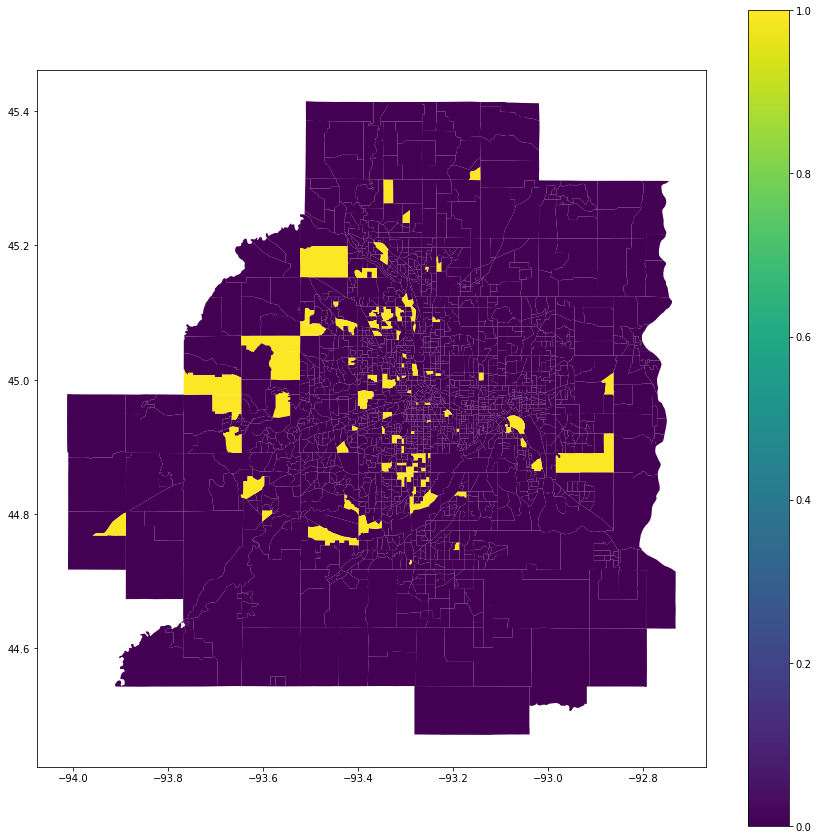

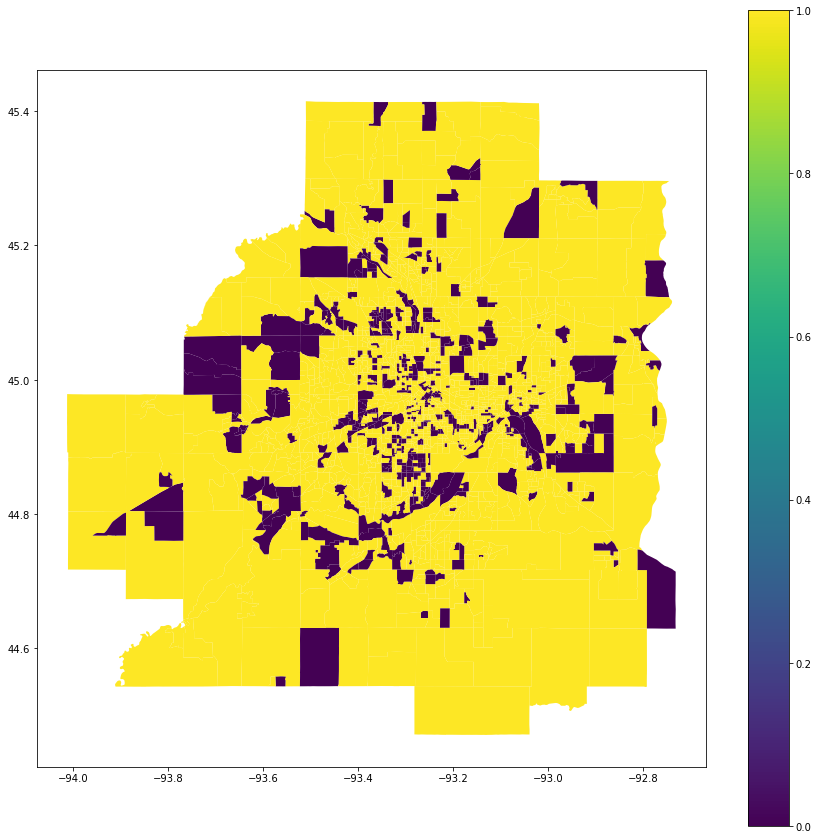

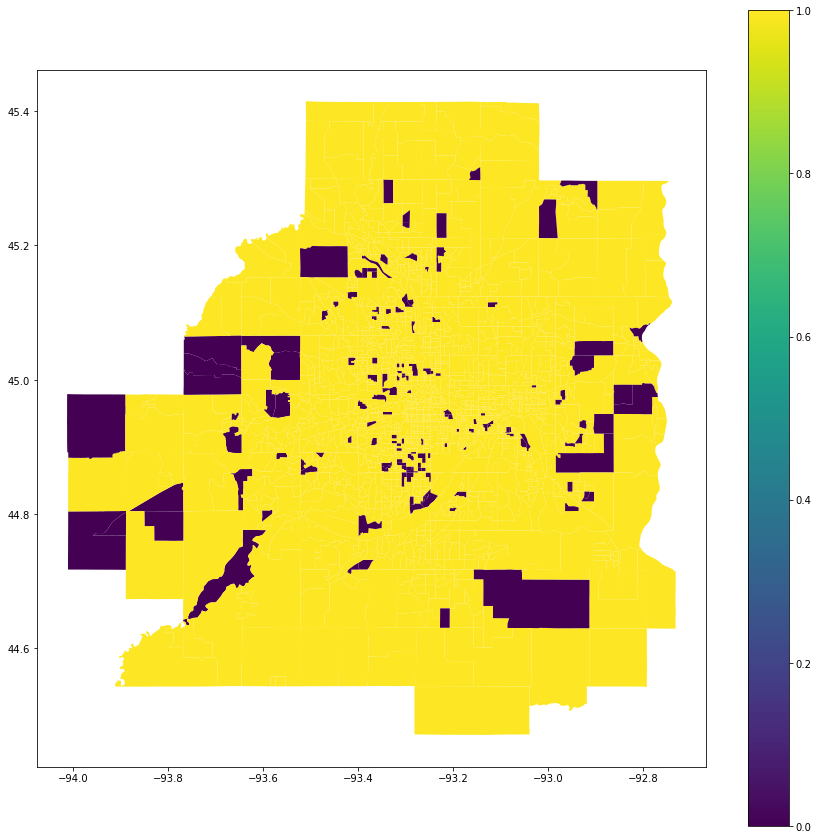

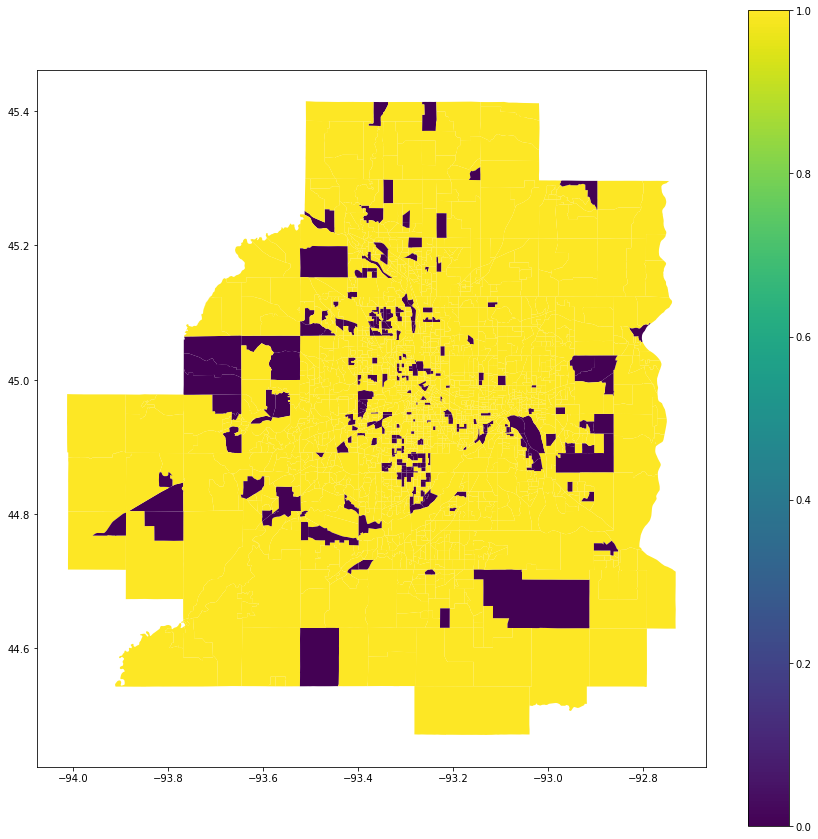

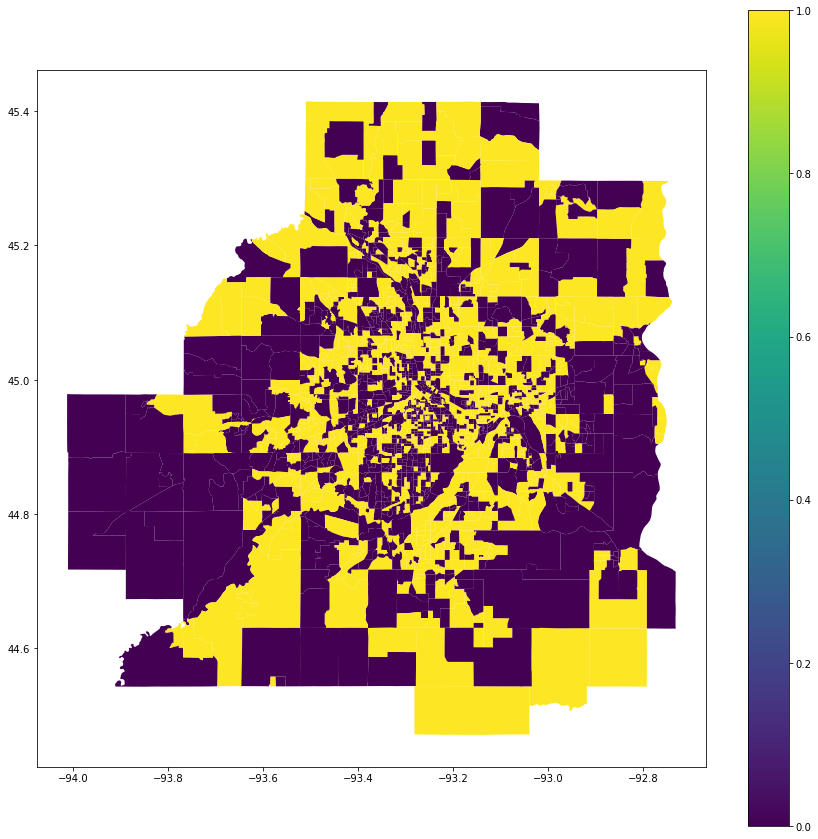

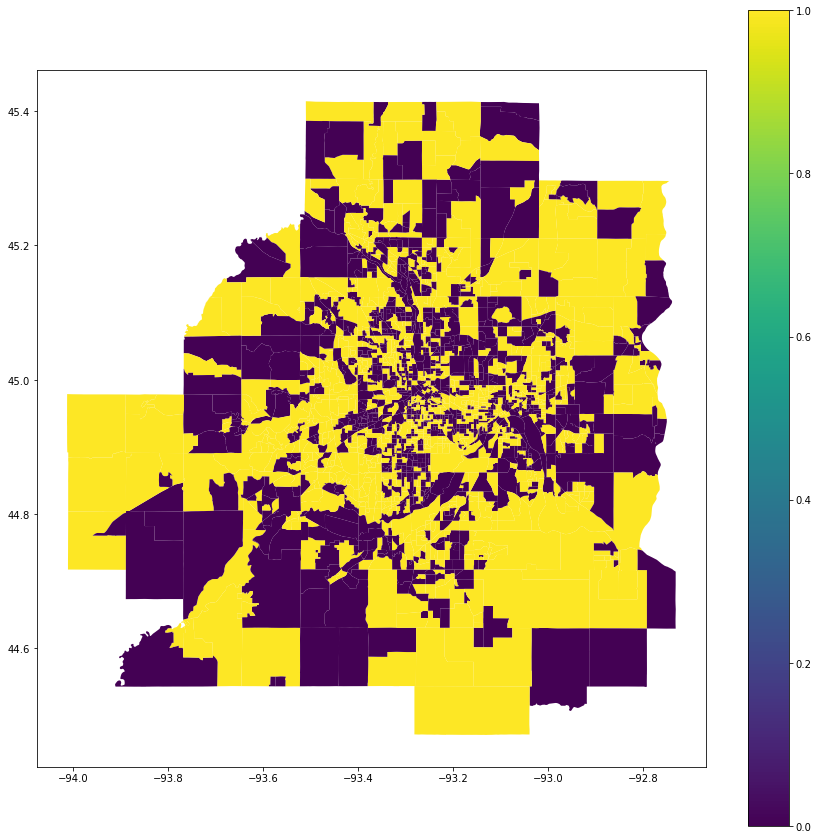

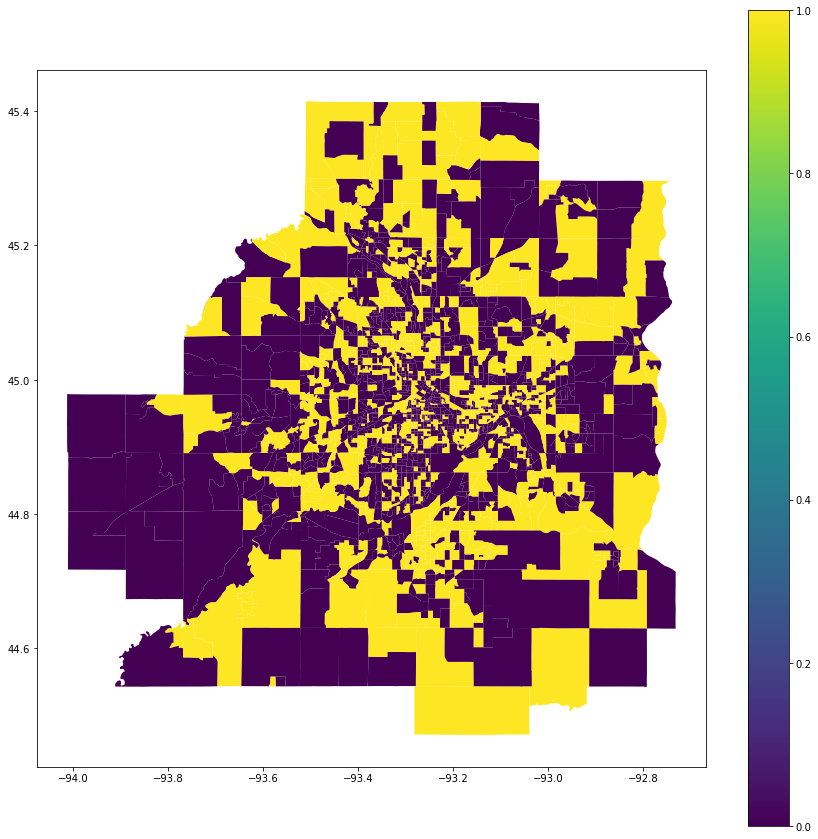

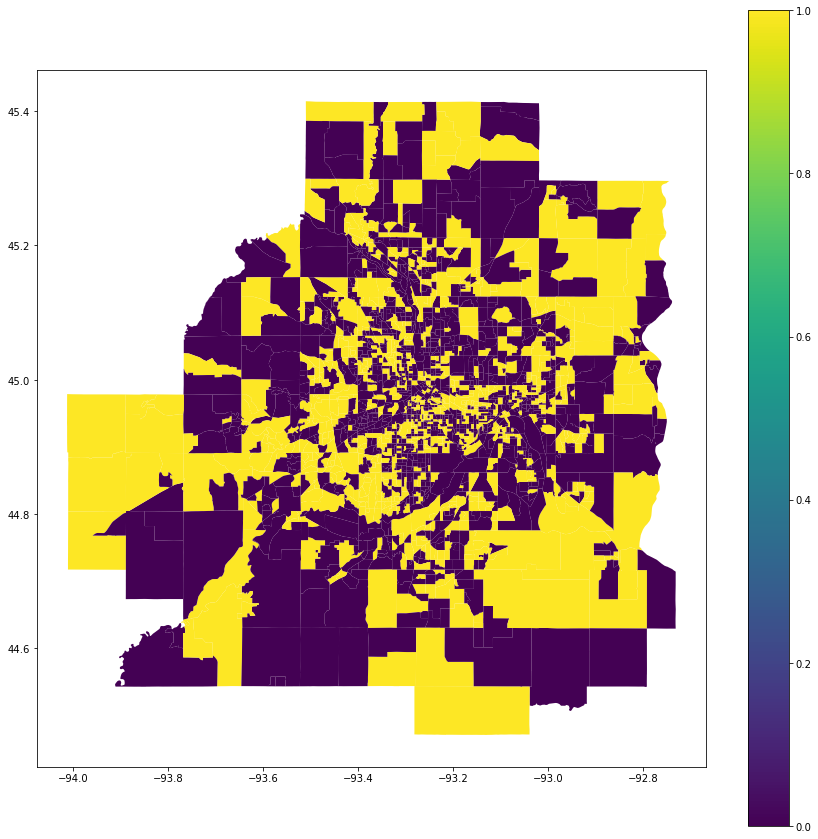

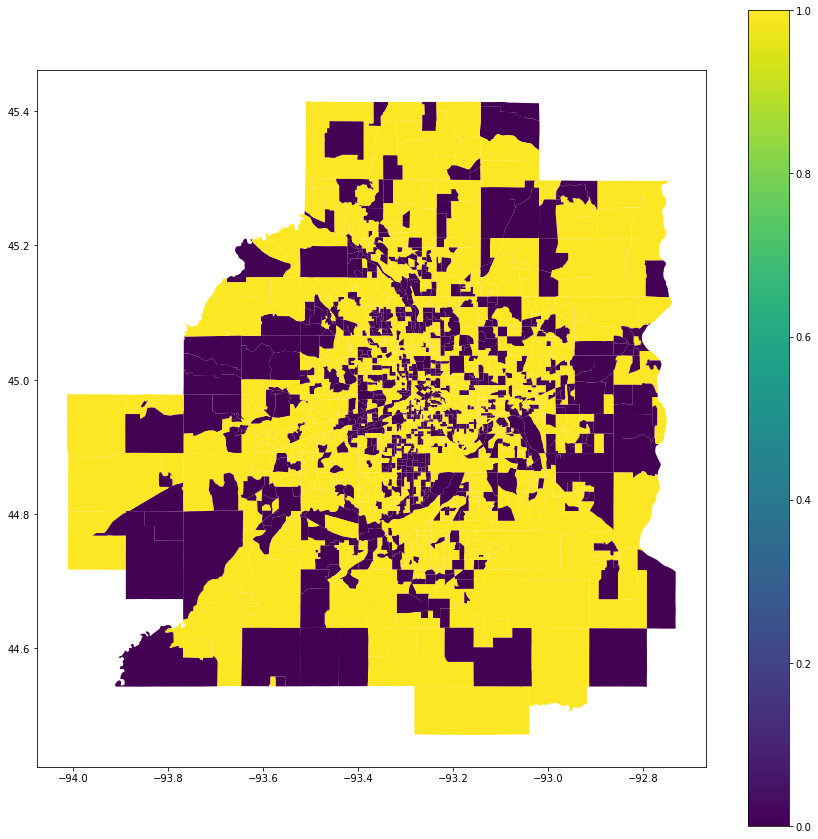

In [23]:
for i in range(9):
    
    result.plot(i, figsize=(15, 15),legend=True)


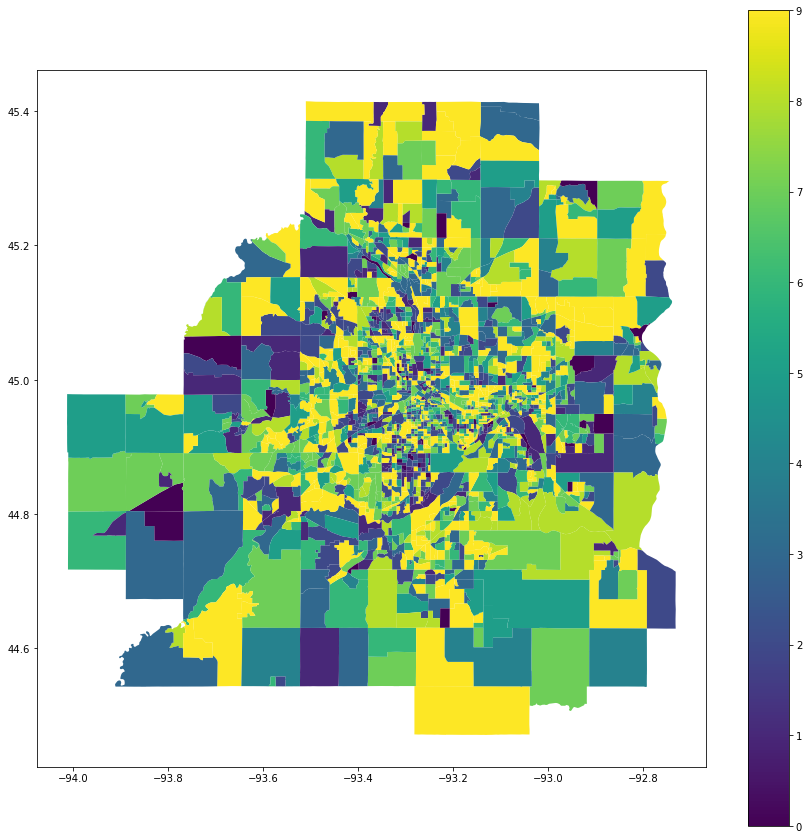

In [25]:
result['overlap_count']=result.iloc[:,10:20].sum(axis=1)
result.plot('overlap_count', figsize=(15, 15),legend=True)
